<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Become familiar with the dataset

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Task 2: Generate Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a boxplot

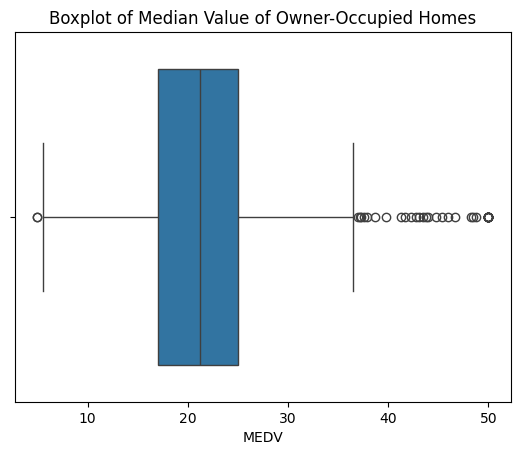

In [9]:
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('MEDV')
pyplot.show()

Provide a  bar plot for the Charles river variable

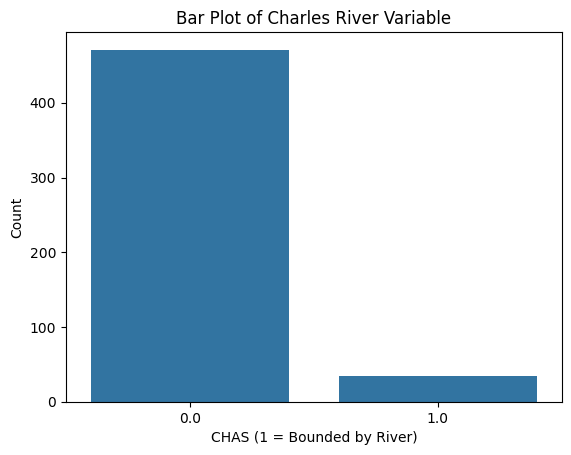

In [10]:
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('CHAS (1 = Bounded by River)')
pyplot.ylabel('Count')
pyplot.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

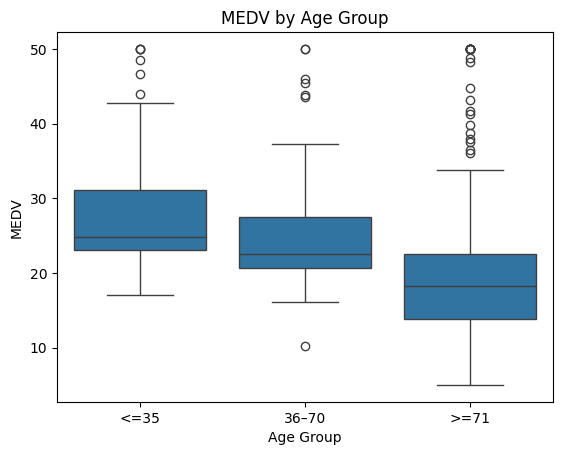

In [12]:
bins = [0, 35, 70, 100]
labels = ['<=35', '36–70', '>=71']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('MEDV by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV')
pyplot.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

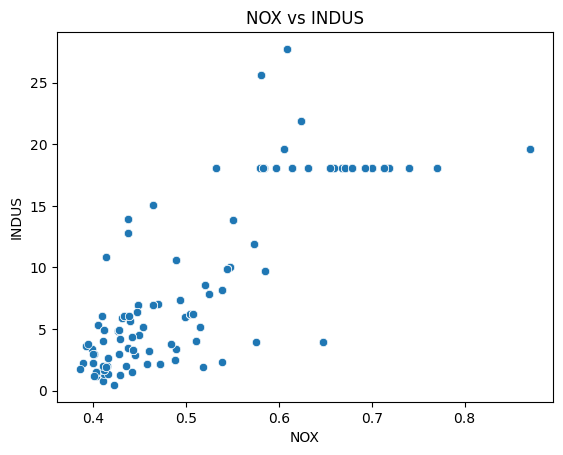

In [13]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('NOX vs INDUS')
pyplot.xlabel('NOX')
pyplot.ylabel('INDUS')
pyplot.show()

Create a histogram for the pupil to teacher ratio variable

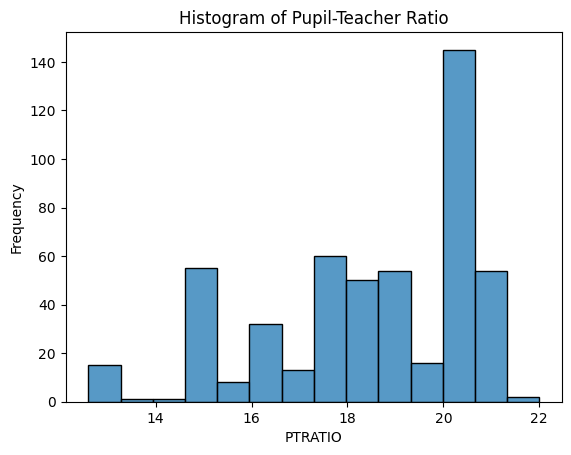

In [14]:
sns.histplot(boston_df['PTRATIO'], kde=False)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Frequency')
pyplot.show()

#### Task 3: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [20]:
# Hypothesis:
# H0: Mean MEDV of houses bounded by river = Mean MEDV of others
# H1: Means are different

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(group1, group0, equal_var=False)
print(f"T-Test (CHAS): t = {t_stat:.3f}, p = {p_val:.4f}")
if p_val < 0.05:
    print("There is a significant difference in MEDV based on CHAS")
else:
    print("No significant difference in MEDV based on CHAS")

T-Test (CHAS): t = 3.113, p = 0.0036
There is a significant difference in MEDV based on CHAS


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [21]:
# Hypothesis:
# H0: Mean MEDV is equal across all age groups
# H1: At least one group has a different mean

group_a = boston_df[boston_df['AGE_GROUP'] == '<=35']['MEDV']
group_b = boston_df[boston_df['AGE_GROUP'] == '36–70']['MEDV']
group_c = boston_df[boston_df['AGE_GROUP'] == '>=71']['MEDV']

f_stat, p_anova = scipy.stats.f_oneway(group_a, group_b, group_c)
print(f"F-statistic: {f_stat:.4f}, P-value: {p_anova:.4f}")
if p_anova < 0.05:
    print("At least one age group differs in MEDV")
else:
    print("No significant difference in MEDV across age groups")

F-statistic: 36.4076, P-value: 0.0000
At least one age group differs in MEDV


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [22]:
# Hypothesis:
# H0: No correlation between NOX and INDUS
# H1: There is a correlation

r, p_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation (NOX ~ INDUS): r = {r:.3f}, p = {p_corr:.4f}")

if p_corr < 0.05:
    print("Significant correlation exists between NOX and INDUS")
else:
    print("No significant correlation between NOX and INDUS")

Pearson Correlation (NOX ~ INDUS): r = 0.764, p = 0.0000
Significant correlation exists between NOX and INDUS


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [23]:
# Hypothesis:
# H0: The coefficient of DIS is 0 (no impact)
# H1: The coefficient of DIS is not 0 (there is impact)

reg_model = ols('MEDV ~ DIS', data=boston_df).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        03:46:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0